In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

c:\Users\1kate\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
jobs_analyzed = df['job_title_short'].value_counts().head(3)
jobs_analyzed = jobs_analyzed.index.to_list()
jobs_analyzed

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [3]:
df = df[df["job_title_short"].isin(jobs_analyzed)]
df = df[["job_title_short","job_skills"]]
df

,job_title_short,job_skills
1,Data Analyst,"['r', 'python', 'sql', 'nosql', 'power bi', 't..."
2,Data Engineer,"['python', 'sql', 'c#', 'azure', 'airflow', 'd..."
3,Data Engineer,"['python', 'c++', 'java', 'matlab', 'aws', 'te..."
4,Data Engineer,"['bash', 'python', 'oracle', 'aws', 'ansible',..."
5,Data Engineer,"['python', 'sql', 'gcp']"
...,...,...
785730,Data Engineer,"['excel', 'word', 'outlook']"
785731,Data Engineer,"['nosql', 'mongodb', 'mongodb', 'python', 'ela..."
785732,Data Engineer,"['python', 'c#', 'java', 'scala', 'sql', 'post..."
785737,Data Analyst,"['sas', 'sas', 'sql', 'excel']"


In [4]:
def skill_cleanup(job_skills):
    if pd.notna(job_skills):
        return ast.literal_eval(job_skills)
    return job_skills
   
df["job_skills"] = df["job_skills"].apply(skill_cleanup)
df.sample(5)

,job_title_short,job_skills
10808,Data Analyst,"[sql, go, power bi, tableau, excel]"
220284,Data Analyst,"[sql, excel, word, powerpoint]"
599636,Data Engineer,"[sql, azure, gcp, aws, databricks]"
769362,Data Analyst,None
549572,Data Scientist,[aws]


In [5]:
df['skills_count'] = df['job_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df = df[df['skills_count'] != 0]

df.sample(4)

,job_title_short,job_skills,skills_count
30481,Data Scientist,"[go, pytorch]",2
482956,Data Scientist,"[python, git, jira]",3
412062,Data Scientist,"[python, r]",2
232696,Data Scientist,[excel],1


In [6]:
df.sort_values(by="skills_count", ascending=False)

,job_title_short,job_skills,skills_count
624591,Data Engineer,"[go, sql, python, t-sql, c#, r, javascript, ja...",53
762511,Data Engineer,"[python, ruby, ruby, javascript, java, golang,...",52
96630,Data Engineer,"[python, ruby, ruby, javascript, java, golang,...",51
247183,Data Engineer,"[python, ruby, ruby, javascript, php, golang, ...",51
145275,Data Engineer,"[java, python, ruby, ruby, javascript, php, go...",49
...,...,...,...
441073,Data Analyst,[r],1
441071,Data Analyst,[windows],1
568160,Data Analyst,[excel],1
37653,Data Engineer,[gcp],1


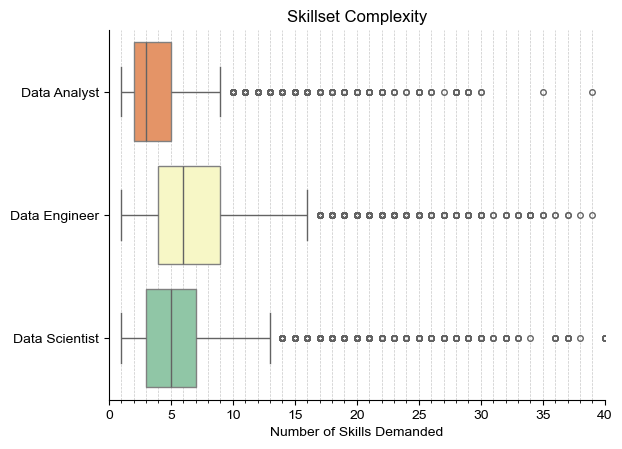

In [7]:
sns.boxplot(data=df, x='skills_count',y='job_title_short', palette="Spectral", linewidth=1, fliersize=4, boxprops=dict(edgecolor="grey", linewidth=1), hue='job_title_short', legend=False)
sns.set_theme(style='ticks')

plt.title('Skillset Complexity')
plt.xlabel("Number of Skills Demanded")
plt.ylabel('')
sns.despine()
plt.xlim(0, 40)

plt.gca().set_xticks(np.arange(0, 41, 1), minor=True) 
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])

plt.grid(which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()